In [35]:
#Section Analysis done by Caleb Huck
import pandas as pd
import matplotlib.pyplot as plt
import gym
import random
df = pd.read_csv ('AssualtResults.csv')
df.drop(index=df.index[0], axis=0, inplace=True)
df = df.iloc[: , 1:]
print(df)

     episode length  episode score  Action 1  Action 2  Action 3  Action 4  \
1              1119          252.0        38        32        46        37   
2              1346          168.0        63        53        34        43   
3              1336          378.0        65        44        47        41   
4               802          189.0        26        24        35        34   
5              1442          357.0        54        48        54        54   
..              ...            ...       ...       ...       ...       ...   
957            5606         3057.0       137       219       303       407   
958            4673         2054.0       256        47       156       271   
959            7396         3474.0       380       141       274       478   
960            8114         4694.0       219       282       389       547   
961            5858         1931.0       236       116       222       359   

     Action 5  Action 6  
1          42        31  
2          

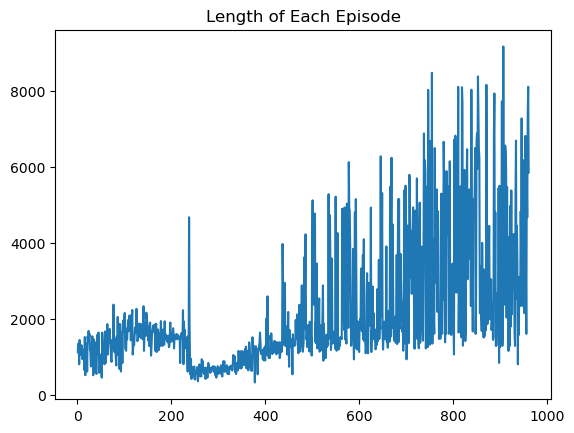

In [25]:
df['episode length'].plot()
plt.title('Length of Each Episode')
plt.show()

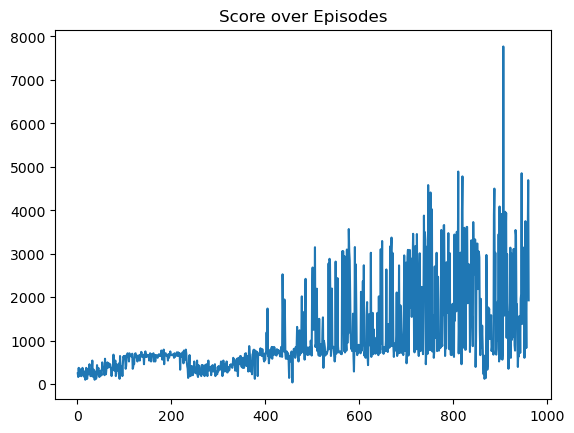

In [24]:
df['episode score'].plot()
plt.title('Score over Episodes')
plt.show()

Action 1     71.232050
Action 2     62.058273
Action 3    119.814776
Action 4    151.696150
Action 5     46.852237
Action 6     25.287201
dtype: float64


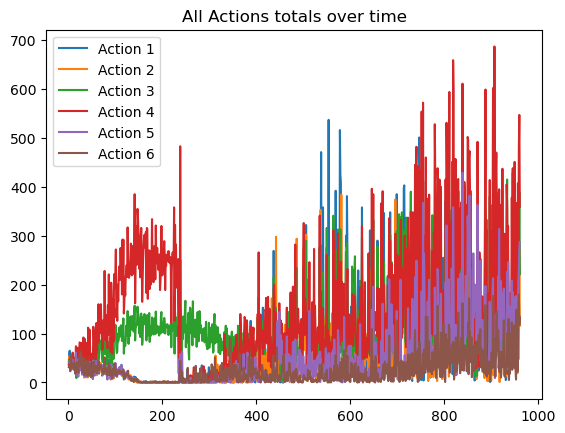

In [30]:
#FYI you forgot the 7th action when recording the data
df2 = df[["Action 1","Action 2","Action 3","Action 4","Action 5","Action 6"]]
print(df2.mean())
df2.plot()
plt.title('All Actions totals over time')
plt.show()

In [26]:
df.loc[df['episode length'].idxmax()]

episode length    9177.0
episode score     7768.0
Action 1           385.0
Action 2           347.0
Action 3           542.0
Action 4           687.0
Action 5            90.0
Action 6            90.0
Name: 907, dtype: float64

In [27]:
df.loc[df['episode score'].idxmax()]
#they are the same

episode length    9177.0
episode score     7768.0
Action 1           385.0
Action 2           347.0
Action 3           542.0
Action 4           687.0
Action 5            90.0
Action 6            90.0
Name: 907, dtype: float64

Action 1    0.179823
Action 2    0.162074
Action 3    0.253153
Action 4    0.320878
Action 5    0.042036
Action 6    0.042036
Name: 907, dtype: float64
[385. 347. 542. 687.  90.  90.]


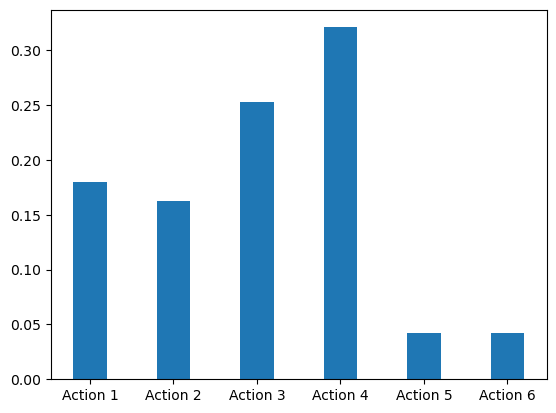

In [64]:
best_run = df.loc[df['episode score'].idxmax()]
#Right is the most commonly used and then up and so on
#due to my error im missing results for 'leftfire'
#total actions = best_run[2:]
best_actions = best_run[2:]
print(best_actions/best_actions.sum())
print(best_actions.values)
plt.bar(best_actions.index, best_actions.values/best_actions.sum(), width = 0.4)
plt.show()

In [28]:
env = gym.make("ALE/Assault-v5")
env.unwrapped.get_action_meanings()
#Right is the most commonly used and then up and so on
#due to my error im missing results for 'leftfire'


['NOOP', 'FIRE', 'UP', 'RIGHT', 'LEFT', 'RIGHTFIRE', 'LEFTFIRE']

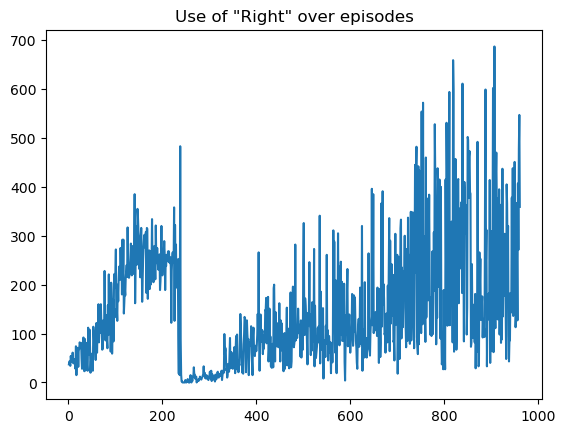

In [31]:
df['Action 4'].plot()
plt.title('Use of "Right" over episodes')
plt.show()

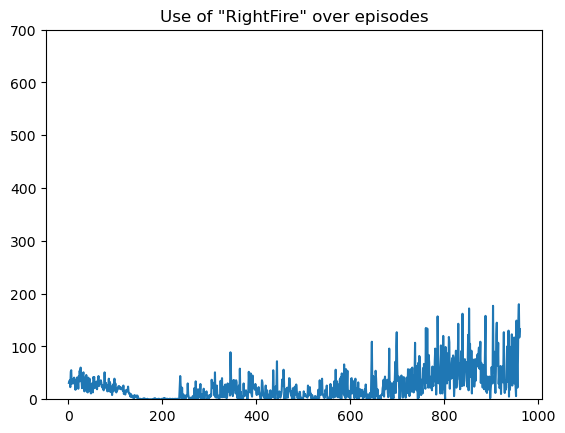

In [33]:
df['Action 6'].plot()
plt.title('Use of "RightFire" over episodes')
plt.ylim(0, 700)
plt.show()
#Still gets use/growth because of extended time

In [40]:
episodes = 961
reward_list2 = []
for episode in range(1, episodes + 1):
    state = env.reset()
    terminated = False
    score = 0 
    act_list = [0,0,0,0,0,0,0]
    while not terminated:
        action = random.choice([0,1,2,3,4,5,6])
        n_state, reward, terminated, trunc, info = env.step(action)
        score+=reward
        act_list[action] = act_list[action] + 1
    reward_list2.append((episode, score, act_list[0], act_list[1], act_list[2], act_list[3], act_list[4], act_list[5], act_list[6]))
env.close()

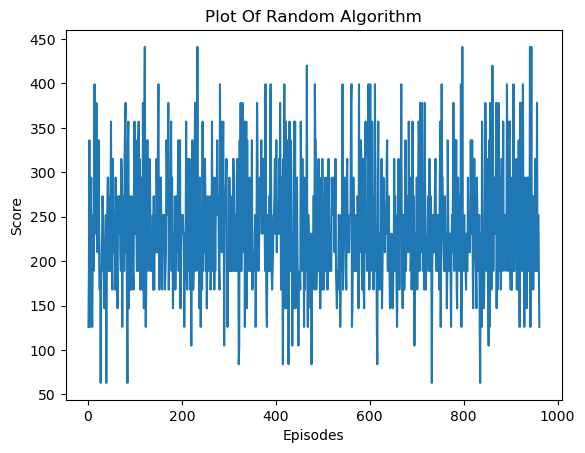

In [41]:
x_values = [point[0] for point in reward_list2]
y_values = [point[1] for point in reward_list2]

plt.plot(x_values,y_values, label = "Random")
plt.xlabel('Episodes')
plt.ylabel('Score')
plt.title('Plot Of Random Algorithm')

plt.show()

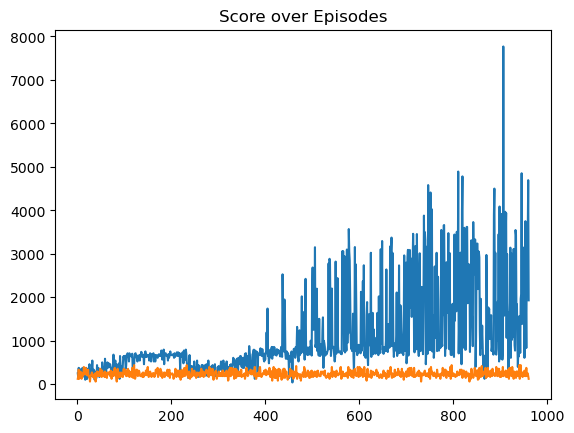

In [44]:
df['episode score'].plot(label="DQN")
plt.plot(x_values,y_values, label = "Random")
plt.title('Score over Episodes')
plt.show()

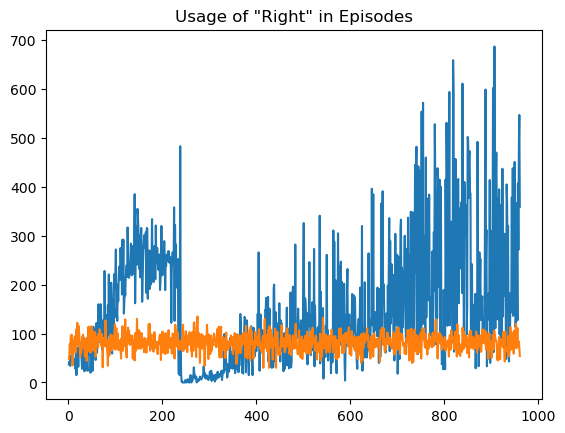

In [66]:
df['Action 4'].plot(label="DQN")
x_values = [point[0] for point in reward_list2]
y_values = [point[5] for point in reward_list2]
plt.plot(x_values,y_values, label = "Random")
plt.title('Usage of "Right" in Episodes')
plt.show()
